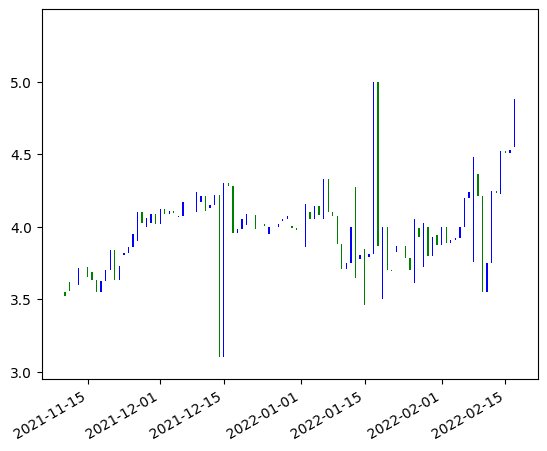

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json


file = open("data/BTCEUR-1h.json","rt", encoding="utf-8")
fileContent = file.read()
dataset = json.loads(fileContent)
file.close()
open = []
close = []
high = []
low = []

for entry in dataset:
    open.append(entry['rate_open'])
    close.append(entry['rate_close'])    
    high.append(entry['rate_high'])    
    low.append(entry['rate_low'])    

periods = len(open)

stock_prices = pd.DataFrame({'open': open,
                             'close': close,
                             'high': high,
                             'low': low},
                            index=pd.date_range(
                              "2021-11-10", periods=100, freq="d"))


plt.figure()
  
# "up" dataframe will store the stock_prices 
# when the closing stock price is greater
# than or equal to the opening stock prices
up = stock_prices[stock_prices.close >= stock_prices.open]
  
# "down" dataframe will store the stock_prices
# when the closing stock price is
# lesser than the opening stock prices
down = stock_prices[stock_prices.close < stock_prices.open]
  
# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'blue'
  
# When the stock prices have increased, then it 
# will be represented by green color candlestick
col2 = 'green'
  
# Setting width of candlestick elements
width = .3
width2 = .03
  
# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)
  
# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)
  
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')
  
# displaying candlestick chart of stock data 
# of a week
plt.show()
%reset